In [1]:
# 필요한 모듈 import
# keras : 딥러닝 모델을 구현하는 라이브러리, 이를 통해 CNN을 구현함
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

# 데이터 로드 및 전처리
# MNIST 데이터 크기랑 같이 불러온 이미지의 크기를 조정함
img_rows, img_cols = 28, 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 입력한 이미지 형태에 따라
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Image data augmentation
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,
        height_shift_range=0.1)

datagen.fit(x_train)

# Define the model
model = Sequential()
model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))

# Compile and fit the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(datagen.flow(x_train,y_train, batch_size=64),
                              epochs = 50, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // 64)

# Save the model
model.save('mnist_model.h5')


Epoch 1/50


2023-06-01 14:15:11.411960: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


937/937 [==============================] - 42s 45ms/step - loss: 0.3609 - accuracy: 0.8896 - val_loss: 0.0482 - val_accuracy: 0.9847
Epoch 2/50
937/937 [==============================] - 43s 46ms/step - loss: 0.1081 - accuracy: 0.9672 - val_loss: 0.0292 - val_accuracy: 0.9905
Epoch 3/50
937/937 [==============================] - 44s 47ms/step - loss: 0.0842 - accuracy: 0.9740 - val_loss: 0.0213 - val_accuracy: 0.9926
Epoch 4/50
937/937 [==============================] - 45s 48ms/step - loss: 0.0698 - accuracy: 0.9794 - val_loss: 0.0235 - val_accuracy: 0.9918
Epoch 5/50
937/937 [==============================] - 45s 48ms/step - loss: 0.0634 - accuracy: 0.9817 - val_loss: 0.0248 - val_accuracy: 0.9925
Epoch 6/50
937/937 [==============================] - 45s 48ms/step - loss: 0.0589 - accuracy: 0.9820 - val_loss: 0.0215 - val_accuracy: 0.9928
Epoch 7/50
937/937 [==============================] - 46s 49ms/step - loss: 0.0523 - accuracy: 0.9845 - val_loss: 0.0260 - val_accuracy: 0.9915
Epo

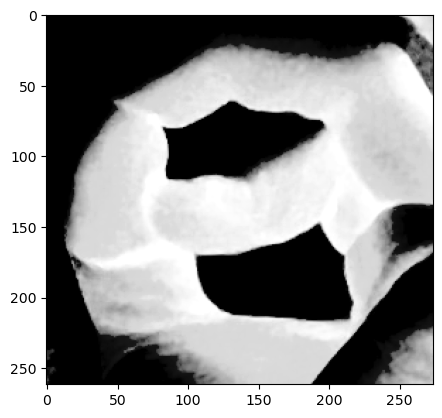

1/1 [==============================] - 0s 56ms/step
삐-빅, 이 숫자는 8 입니다. 휴-먼
Class 0: 0.03%
Class 1: 0.00%
Class 2: 0.00%
Class 3: 0.00%
Class 4: 0.00%
Class 5: 0.00%
Class 6: 0.00%
Class 7: 0.00%
Class 8: 99.97%
Class 9: 0.00%


In [93]:
import cv2
import numpy as np
from keras.models import load_model
import matplotlib.pyplot as plt

# Load the model
model = load_model('mnist_model.h5')

# Load the image file
img = cv2.imread('bum8.png', cv2.IMREAD_GRAYSCALE)

# Display the image
plt.imshow(img, cmap='gray')
plt.show()

# Resize and reshape the image
img_resized = cv2.resize(img, (28, 28))
img_ready = img_resized.reshape(1, 28, 28, 1)

# Normalize the image
img_ready = img_ready.astype('float32')
img_ready /= 255

# Predict the digit
proba = model.predict(img_ready)
digit = np.argmax(proba)

# Print the predicted digit
print("삐-빅, 이 숫자는", digit,"입니다. 휴-먼")

# Print each class's probability
for i in range(10):
    print(f"Class {i}: {proba[0][i] * 100:.2f}%")